In [78]:
import simpm.des as des

env=des.Environment()


In [79]:
car1=des.Entity(env,"car1",True)
car2=des.Entity(env,"car2",True)
car3=des.Entity(env,"car3",True)
lot=des.Resource(env,"parking-lot",init=2,print_actions=True,log=True)

car1(1) is created, sim_time: 0
car2(2) is created, sim_time: 0
car3(3) is created, sim_time: 0


In [80]:
def car_process(carent,lot):
    while True:
        yield carent.get(lot,1)
        yield carent.do("park",5)
        yield carent.put(lot,1)
        yield carent.do("drive",3)



In [81]:
env.process(car_process(car1,lot))
env.process(car_process(car2,lot))
env.process(car_process(car3,lot))
env.run(until=100)

car1(1) requested 1 parking-lot(s)(1), sim_time: 0
car2(2) requested 1 parking-lot(s)(1), sim_time: 0
car3(3) requested 1 parking-lot(s)(1), sim_time: 0
car1(1) got 1 parking-lot(s)(1), sim_time: 0
car2(2) got 1 parking-lot(s)(1), sim_time: 0
car1(1) started park , sim_time: 0
car2(2) started park , sim_time: 0
car1(1) finished park , sim_time: 5
car2(2) finished park , sim_time: 5
car1(1) put back 1 parking-lot(s)(1), sim_time: 5
car2(2) put back 1 parking-lot(s)(1), sim_time: 5
car1(1) started drive , sim_time: 5
car3(3) got 1 parking-lot(s)(1), sim_time: 5
car2(2) started drive , sim_time: 5
car3(3) started park , sim_time: 5
car1(1) finished drive , sim_time: 8
car2(2) finished drive , sim_time: 8
car1(1) requested 1 parking-lot(s)(1), sim_time: 8
car2(2) requested 1 parking-lot(s)(1), sim_time: 8
car1(1) got 1 parking-lot(s)(1), sim_time: 8
car1(1) started park , sim_time: 8
car3(3) finished park , sim_time: 10
car3(3) put back 1 parking-lot(s)(1), sim_time: 10
car3(3) started dri

In [93]:
car3.waiting_time().sum()
env.now

5

In [83]:
lot.waiting_time().mean()


0.18421052631578946

Earth moving example 
* We have 3 trucks
* Cpacity of trucks is 10 m3
* Loading Time is 10 minutes
* Haul Time(Minutes) is 30 minutes
* Dump Time (Minutes): 5 minutes
* Return Time (Minutes):10 minutes 
How long does it take to dump 10000 m3 of dirt? 

In [103]:
import simpm.des as des
env=des.Environment()

t1=des.Entity(env,"truck",True)
t2=des.Entity(env,"truck",True)
t3=des.Entity(env,"truck",True)
t4=des.Entity(env,"truck",True)
t5=des.Entity(env,"truck",True)

dirt=des.Resource(env,"dirt",init=10000,capacity=10000)
loader=des.Resource(env,"loader",init=2)
dump_station=des.Resource(env,"dump_station",init=1)

def truck_process(truck_e,loader,dump_station,dirt):
    while True:
        yield truck_e.get(loader,1)
        yield truck_e.get(dirt,10)
        yield truck_e.do("loading",10)
        yield truck_e.put(loader,1)
        yield truck_e.do("hauling",30)
        yield truck_e.get(dump_station,1)
        yield truck_e.do("dumping",5)
        yield truck_e.put(dump_station,1)
        yield truck_e.do("returning",10)


env.process(truck_process(t1,loader,dump_station,dirt))
env.process(truck_process(t2,loader,dump_station,dirt))
env.process(truck_process(t3,loader,dump_station,dirt))
env.process(truck_process(t4,loader,dump_station,dirt))
env.process(truck_process(t5,loader,dump_station,dirt))

env.run()        


truck(1) is created, sim_time: 0
truck(2) is created, sim_time: 0
truck(3) is created, sim_time: 0
truck(4) is created, sim_time: 0
truck(5) is created, sim_time: 0
truck(1) requested 1 loader(s)(2), sim_time: 0
truck(2) requested 1 loader(s)(2), sim_time: 0
truck(3) requested 1 loader(s)(2), sim_time: 0
truck(4) requested 1 loader(s)(2), sim_time: 0
truck(5) requested 1 loader(s)(2), sim_time: 0
truck(1) got 1 loader(s)(2), sim_time: 0
truck(2) got 1 loader(s)(2), sim_time: 0
truck(1) requested 10 dirt(s)(1), sim_time: 0
truck(2) requested 10 dirt(s)(1), sim_time: 0
truck(1) got 10 dirt(s)(1), sim_time: 0
truck(2) got 10 dirt(s)(1), sim_time: 0
truck(1) started loading , sim_time: 0
truck(2) started loading , sim_time: 0
truck(1) finished loading , sim_time: 10
truck(2) finished loading , sim_time: 10
truck(1) put back 1 loader(s)(2), sim_time: 10
truck(2) put back 1 loader(s)(2), sim_time: 10
truck(1) started hauling , sim_time: 10
truck(3) got 1 loader(s)(2), sim_time: 10
truck(2) s

In [104]:
env.now

11020

In [11]:
arrival_time=[2,4,6,12,15,17,18,18]
import simpm.des as des
import simpm.dist as dist
env=des.Environment()
myCustomers=[]
s=des.Resource(env,"servant",1)


def customer_process(c,arrival,servant):
    yield c.do("arrive",arrival)
    yield c.get(servant,1)
    yield c.do("get_served",dist.norm(5,1))
    yield c.put(servant,1)

for t in arrival_time:
    c=des.Entity(env,"customer",True)
    myCustomers.append(c)
    env.process(customer_process(c,t,s))

env.run()

customer(1) is created, sim_time: 0
customer(2) is created, sim_time: 0
customer(3) is created, sim_time: 0
customer(4) is created, sim_time: 0
customer(5) is created, sim_time: 0
customer(6) is created, sim_time: 0
customer(7) is created, sim_time: 0
customer(8) is created, sim_time: 0
customer(1) started arrive , sim_time: 0
customer(2) started arrive , sim_time: 0
customer(3) started arrive , sim_time: 0
customer(4) started arrive , sim_time: 0
customer(5) started arrive , sim_time: 0
customer(6) started arrive , sim_time: 0
customer(7) started arrive , sim_time: 0
customer(8) started arrive , sim_time: 0
customer(1) finished arrive , sim_time: 2
customer(1) requested 1 servant(s)(1), sim_time: 2
customer(1) got 1 servant(s)(1), sim_time: 2
customer(1) started get_served , sim_time: 2
customer(2) finished arrive , sim_time: 4
customer(2) requested 1 servant(s)(1), sim_time: 4
customer(1) finished get_served , sim_time: 5.625620532237904
customer(1) put back 1 servant(s)(1), sim_time

In [11]:
import simpm.des as des
import simpm.dist as dist
env=des.Environment()
myCustomers=[]
s=des.Resource(env,"servant",1)


def customer_process(c,arrival,servant):
    yield c.do("arrive",arrival)
    yield c.get(servant,1)
    yield c.do("get_served",dist.norm(2,1))
    yield c.put(servant,1)

t=0
for i in range(10000):
    c=des.Entity(env,"customer")
    env.process(customer_process(c,t,s))
    t+=dist.expon(2).sample()

env.run()

In [12]:
s.waiting_time().mean()

216.00573492942937

In [61]:
s.status_log()

,time,in_use,idle,queue_length
0,0.000000,0.0,2.0,1.0
1,0.000000,1.0,1.0,0.0
2,0.237234,1.0,1.0,1.0
3,0.237234,2.0,0.0,0.0
4,0.704019,1.0,1.0,0.0
...,...,...,...,...
29995,19776.122137,2.0,0.0,1.0
29996,19776.812481,1.0,1.0,1.0
29997,19776.812481,2.0,0.0,0.0
29998,19778.373229,1.0,1.0,0.0


In [62]:
s.status_log()["queue_length"].mean()

1.7746666666666666

<Axes: xlabel='time'>

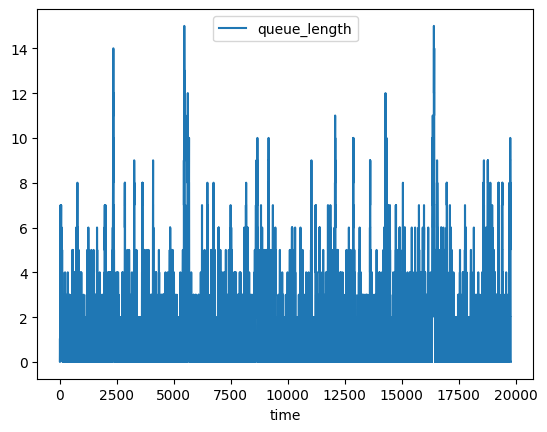

In [63]:
import matplotlib.pyplot as plt
s.status_log().plot("time","queue_length")

#of trucks: l->3,s->2 
* Capacity (cm):l->20,s->15 
* Loading Time (Minutes):l->5,s->3 
* Haul Time(Minutes): l->35, s->25 
* Dump Time (Minutes):l->2,s->1.5 
* Return Time (Minutes):l->20,s->13 


In [66]:
import simpm.des as des
def test_truck_numbers(n)
    env=des.Environment()
    ts=[]

    for i in range(n):
        lt=des.Entity(env,"truck",True)
        lt["capacity"]=20
        lt["loading time"]=5
        lt["hauling time"]=35
        lt["dumping time"]=2
        lt["returning time"]=20
        ts.append(lt)
    for i in range(2):
        st=des.Entity(env,"truck",True)
        st["capacity"]=15
        st["loading time"]=3
        st["hauling time"]=25
        st["dumping time"]=1.5
        st["returning time"]=13
        ts.append(st)

    dirt=des.Resource(env,"dirt",init=10000,capacity=10000)
    loader=des.Resource(env,"loader",init=2)
    dump_station=des.Resource(env,"dump_station",init=1)

    def truck_process(truck_e,loader,dump_station,dirt):
        while True:
            yield truck_e.get(loader,1)
            yield truck_e.get(dirt,truck_e["capacity"])
            yield truck_e.do("loading",truck_e["loading time"])
            yield truck_e.put(loader,1)
            yield truck_e.do("hauling",truck_e["hauling time"])
            yield truck_e.get(dump_station,1)
            yield truck_e.do("dumping",truck_e["dumping time"])
            yield truck_e.put(dump_station,1)
            yield truck_e.do("returning",truck_e["returning time"])

    for truck in ts:
        env.process(truck_process(truck,loader,dump_station,dirt))


    env.run()        
    return s.waiting_time().mean()

truck(1) is created, sim_time: 0
truck(2) is created, sim_time: 0
truck(3) is created, sim_time: 0
truck(4) is created, sim_time: 0
truck(5) is created, sim_time: 0
truck(1) requested 1 loader(s)(2), sim_time: 0
truck(2) requested 1 loader(s)(2), sim_time: 0
truck(3) requested 1 loader(s)(2), sim_time: 0
truck(4) requested 1 loader(s)(2), sim_time: 0
truck(5) requested 1 loader(s)(2), sim_time: 0
truck(1) got 1 loader(s)(2), sim_time: 0
truck(2) got 1 loader(s)(2), sim_time: 0
truck(1) requested 20 dirt(s)(1), sim_time: 0
truck(2) requested 20 dirt(s)(1), sim_time: 0
truck(1) got 20 dirt(s)(1), sim_time: 0
truck(2) got 20 dirt(s)(1), sim_time: 0
truck(1) started loading , sim_time: 0
truck(2) started loading , sim_time: 0
truck(1) finished loading , sim_time: 5
truck(2) finished loading , sim_time: 5
truck(1) put back 1 loader(s)(2), sim_time: 5
truck(2) put back 1 loader(s)(2), sim_time: 5
truck(1) started hauling , sim_time: 5
truck(3) got 1 loader(s)(2), sim_time: 5
truck(2) started